Some code to study the overall RFI stats generated from Jiapeng Zhang's RFI flagging work. It plots the % of times a given frequency bin is flagged, as well as the overall % of band masked for a chosen occurance threshold.

In [32]:
import csv
import matplotlib as mpl
import pylab as plt
import numpy as np

In [17]:
#Read the csv file
rows = []
with open('RFI_for_L.csv', newline='') as csvfile:
    Lband = csv.reader(csvfile, delimiter=',')
    next(Lband)
    for row in Lband:
        row[2] = row[2].replace("\n", "")
        rows.append(row)

In [104]:
#L-band range
Freq_Bins = np.arange(856,1712,1)  #Counting no. of rfi flags every 1 MHz
Occ_Counts = np.zeros(len(Freq_Bins))


In [136]:
BW_total = Freq_Bins[-1]-Freq_Bins[0]
print(BW_total)

855


In [122]:
#Loop through each line (filename), use the histogram function to count the number of flagged freq that falls under each Freq_bin

for i in range(len(rows)):
    filename = rows[i][1]
    tmp = rows[i][2].replace("[", "").replace("]", "").split()
    x = np.array(tmp)
    RFI = x.astype(np.float)
    histo=np.histogram(RFI,bins=np.append(Freq_Bins,Freq_Bins[-1]+1))
    Occ_Counts = Occ_Counts + histo[0]

<ipython-input-122-9a00dd74e1bd>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  RFI = x.astype(np.float)


In [126]:
#Figure out % of band flagged for a given threshold
Threshold_Bins = np.arange(0,np.max(Occ_Counts),10)
histo=np.histogram(Occ_Counts,bins=np.append(Threshold_Bins,Threshold_Bins[-1]+10))

#Use the cumulative sum function to find out the % of band masked. need to flip the array so the sum is correct
Percent_band = histo[0]
Percent_band = np.cumsum(np.flip(Percent_band))

(0.0, 100.0)

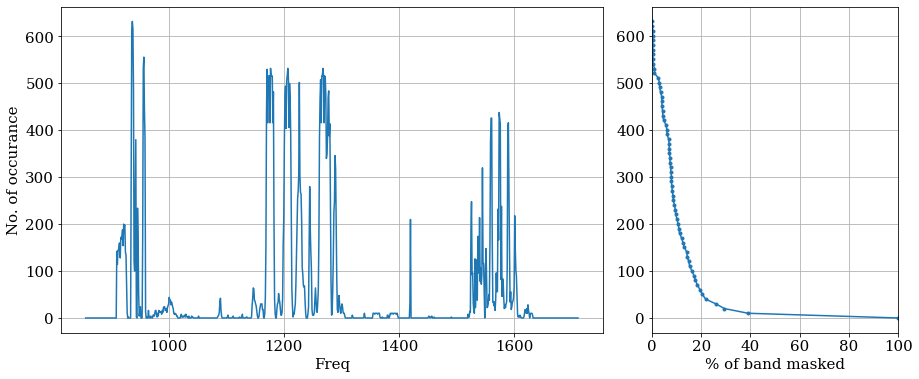

In [144]:
fig = plt.figure(figsize=[15,6])
plt.subplots_adjust(wspace = 0.2)
mpl.rcParams.update({'font.size': 15,'font.family': 'serif'})



ax = plt.subplot2grid((1,3),(0,0), rowspan=1,colspan=2)
ax.plot(Freq_Bins,Occ_Counts)
ax.set_ylabel("No. of occurance")
ax.set_xlabel("Freq (MHz)")
ax.grid()


ax2 = plt.subplot2grid((1,3),(0,2), rowspan=1,colspan=1)
ax2.plot(np.flip(Percent_band)/BW_total*100,Threshold_Bins,marker="o",markersize=3)
ax2.grid()
ax2.set_xlabel("% of band masked")
ax2.set_xlim(0,100)

Text(0, 0.5, 'No of obs')

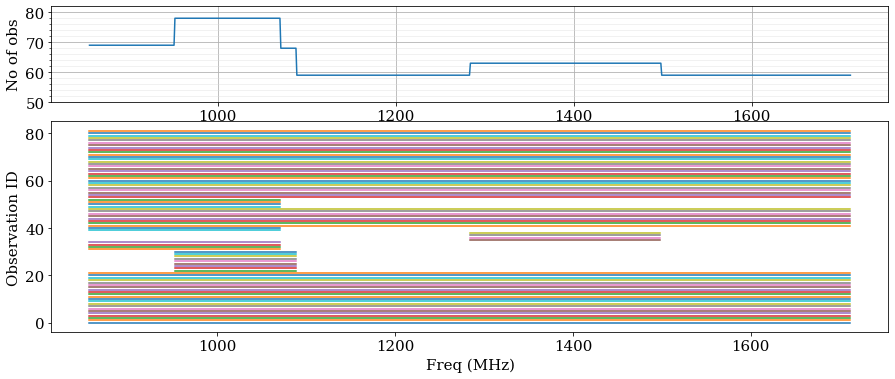

In [171]:
#For each freq bin, count the number of obs which include that
fig = plt.figure(figsize=[15,6])
N_obs = np.zeros(len(Freq_Bins))
file_BW = np.genfromtxt("BW-L.dat")

ax = plt.subplot2grid((3,1),(1,0), rowspan=2,colspan=1)

for i in range(len(file_BW)):
    f1 = file_BW[i][1]
    f2 = file_BW[i][2]
    for f in range(len(Freq_Bins)):
        if Freq_Bins[f] <= f2 and Freq_Bins[f] >= f1:
            N_obs[f] = N_obs[f]+1
    ax.plot((f1,f2),(i,i))
            
#print(N_obs)

ax.set_xlabel("Freq (MHz)")
ax.set_ylabel("Observation ID")


ax2 = plt.subplot2grid((3,1),(0,0), rowspan=1,colspan=1)
ax2.plot(Freq_Bins, N_obs)
#ax2.set_xticklabels("")
ax2.set_ylim(50,82)
ax2.set_yticks(np.arange(50,82, 10))
minor_ticks = np.arange(50, 82, 2)
ax2.set_yticks(minor_ticks, minor=True)
ax2.grid()
ax2.grid(b=True, which='minor', color='gainsboro', linestyle='-',alpha=0.5)
ax2.set_ylabel("No of obs")
#print(N_obs)

A total of 82 observations were included in this L-band study. From this plot, we can see that no freq bin was available for all obs. 

In [189]:
#Figure out % of band flagged for a given threshold using the normalized occurance

Occ_Norm = Occ_Counts/N_obs

Threshold_Bins_Norm = np.arange(0,np.max(Occ_Norm),0.5)
histo=np.histogram(Occ_Norm,bins=np.append(Threshold_Bins_Norm,Threshold_Bins_Norm[-1]+0.5))

#Use the cumulative sum function to find out the % of band masked. need to flip the array so the sum is correct
Percent_band_Norm = histo[0]
Percent_band_Norm = np.cumsum(np.flip(Percent_band_Norm))

Text(0, 0.5, 'No of obs')

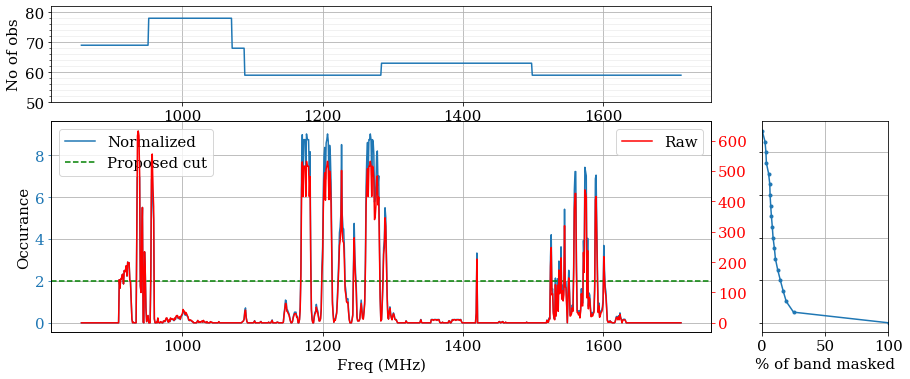

In [202]:
#Re-plot dividing by N_obs 

fig = plt.figure(figsize=[15,6])
plt.subplots_adjust(wspace = 0.4)
mpl.rcParams.update({'font.size': 15,'font.family': 'serif'})


#Main panel 
ax = plt.subplot2grid((3,5),(1,0), rowspan=2,colspan=4)
ax.plot(Freq_Bins,Occ_Norm,label="Normalized")
ax.set_ylabel("Occurance")
ax.set_xlabel("Freq (MHz)")
ax.grid()
axb= ax.twinx()
axb.plot(Freq_Bins,Occ_Counts,c='r',label="Raw")

axb.tick_params(axis='y', colors='red')
ax.tick_params(axis='y', colors='#1f77b4')
ax.axhline(y=2,c="g",label="Proposed cut",ls="--")
ax.legend(loc=2)
axb.legend(loc=1)

#Right lateral panel
ax2 = plt.subplot2grid((3,5),(1,4), rowspan=2,colspan=1)
ax2.plot(np.flip(Percent_band_Norm)/BW_total*100,Threshold_Bins_Norm,marker="o",markersize=3)
ax2.grid()
ax2.set_xlabel("% of band masked")
ax2.set_xlim(0,100)
ax2.set_yticklabels("")


#Top panel
ax3 = plt.subplot2grid((3,5),(0,0), rowspan=1,colspan=4)
ax3.plot(Freq_Bins, N_obs)
ax3.set_ylim(50,82)
ax3.set_yticks(np.arange(50,82, 10))
minor_ticks = np.arange(50, 82, 2)
ax3.set_yticks(minor_ticks, minor=True)
ax3.grid()
ax3.grid(b=True, which='minor', color='gainsboro', linestyle='-',alpha=0.5)
ax3.set_ylabel("No of obs")



In [200]:
#Print out the master list of RFI to mask

MasterRFI = []
for i in range(len(Freq_Bins)):
    if Occ_Norm[i]>=2:
        MasterRFI.append(Freq_Bins[i])
        
print(MasterRFI)

[910, 912, 913, 914, 915, 917, 918, 919, 920, 921, 922, 923, 924, 925, 935, 936, 937, 938, 939, 942, 943, 946, 947, 955, 956, 957, 958, 959, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1244, 1245, 1246, 1247, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1286, 1287, 1288, 1289, 1290, 1291, 1420, 1525, 1526, 1532, 1535, 1537, 1540, 1545, 1546, 1551, 1558, 1559, 1560, 1561, 1562, 1572, 1573, 1574, 1575, 1576, 1578, 1589, 1590, 1591, 1592, 1601, 1602]
